The challenge is from [here](https://www.aicrowd.com/challenges/ai-blitz-xii/problems/programming-language-classification/notebooks).

In [26]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

In [27]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/dBPe8wsLgp4gyL9BY6pn_GLbPjUgInhdwsM3W33AVsI
API Key valid
Gitlab access token valid
Saved details successfully!


In [ ]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c programming-language-classification -o data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

from sklearn import set_config
set_config(display="diagram")

plt.rcParams["figure.figsize"] = (15,6)

In [2]:
#load and read datasets
trainData = pd.read_csv("data/train.csv")
testData = pd.read_csv("data/test.csv")

In [3]:
#five first rows of trainData
trainData.head()

,id,code,language
0,14026,var result = testObj1 | testObj2;\...,c-sharp
1,12201,/// Initializes a new instance of ...,c-sharp
2,17074,/*\n\n Explanation :- a user gives a Strin...,javascript
3,21102,int sum = 0;\n\n for (int i = ...,c-plus-plus
4,53065,if (p->data < min)\n\n {\n\n ...,c


In [4]:
#five first rows of testData
testData.head()

,id,code
0,10684,28 = 22 + 23 + 24\n\n 33 = 32 + 23 + 24\n\n 49...
1,17536,this.path = path;\n\n this.estimat...
2,26383,{\n\n ...
3,29090,"/**\n\n * Class for converting from ""any"" bas..."
4,10482,"{ cout<<""Destructing base \n""; } ..."


/Users/maxhager/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

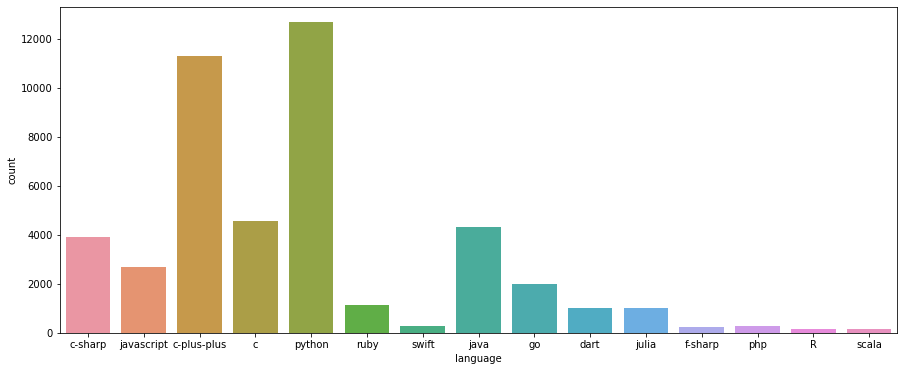

In [5]:
#distribution of programming languages in a plot
sn.countplot(trainData["language"])

In [6]:
#import of label encoder. 
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder().fit(trainData.language)
trainData["target"] = LE.transform(trainData.language)

In [7]:
trainData.head()

,id,code,language,target
0,14026,var result = testObj1 | testObj2;\...,c-sharp,3
1,12201,/// Initializes a new instance of ...,c-sharp,3
2,17074,/*\n\n Explanation :- a user gives a Strin...,javascript,8
3,21102,int sum = 0;\n\n for (int i = ...,c-plus-plus,2
4,53065,if (p->data < min)\n\n {\n\n ...,c,1


In [11]:
XTrain, XComb, YTrain, YComb = train_test_split(trainData["code"],trainData["target"],test_size=0.3,random_state=0 , shuffle = False) 
XValidation,XTest,YValidation,YTest = train_test_split(XComb,YComb,test_size=0.5,random_state=0, shuffle = False)



In [13]:
XTrain.shape,XValidation.shape,XTest.shape,YTrain.shape,YValidation.shape,YTest.shape

((31939,), (6844,), (6845,), (31939,), (6844,), (6845,))

In [14]:
classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
classifier = classifier.fit(XTrain, YTrain)

In [15]:
classifier

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [16]:
print("F1:" ,f1_score(YValidation,classifier.predict(XValidation),average='macro'))
print("Accuracy:" ,accuracy_score(YValidation,classifier.predict(XValidation))*100)

F1: 0.3301637817357806
Accuracy: 65.31268264172998


In [18]:
testData.shape

(9277, 2)

In [19]:
testData["target"] = classifier.predict(testData["code"])

In [20]:
testData.head()

,id,code,target
0,10684,28 = 22 + 23 + 24\n\n 33 = 32 + 23 + 24\n\n 49...,11
1,17536,this.path = path;\n\n this.estimat...,11
2,26383,{\n\n ...,1
3,29090,"/**\n\n * Class for converting from ""any"" bas...",11
4,10482,"{ cout<<""Destructing base \n""; } ...",2


In [22]:
testData = testData.sample(frac=1)
testData.head()

,id,code,target
1699,14174,"@testset ""Strings"" begin\n\n @testset ""Str...",2
6817,31094,* @param pos a position into the list f...,11
8120,24626,count = 0\n\n nums.each_with_index do |num...,11
1882,27690,minIndex = this.heap[2 * k] < this.hea...,11
1348,25054,"""""""\n\n count_nucleotides(s::AbstractStrin...",11


In [38]:
!rm -rf assets
!mkdir assets
testData.to_csv(os.path.join("assets","submission.csv"))

In [39]:
%aicrowd notebook submit -c programming-language-classification -a assets --no-verify

Notebook Not Found Error: Could not locate the absolute path to the jupyter notebook
